# <center><i><b><u>Student Stream Recommendation System using Machine Learning</i></b></u></center>

# <i>PROBLEM STATEMENT</i>

Students often struggle to choose the right stream (Science, Commerce, Arts) after 10th standard. The wrong choice can affect their future career. This project aims to build a machine learning model that recommends the most suitable stream based on the student's performance in subjects like Mathematics, Science, English, Social Studies, etc.

# <i> IMPORT LIBRARIES</i>

In [1]:
#for numerical data
import numpy as np
#for analysis and manipulation of structured data
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#normality
import scipy
#hypothesis
from scipy.stats import shapiro

#train test split
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

#model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#pickle file
import pickle


#for ignoring warnings
import warnings as wr
wr.filterwarnings('ignore')

# <i>DATA GATHERING</i>

### LOAD DATASET


1. Understand the Dataset<br>
Load Data: Import the dataset using libraries like pandas.

In [2]:
df=pd.read_csv(r"C:\Users\Disha Katare\Downloads\student_stream_dataset_500.csv")

### PREVIWEING ON DATA

Preview Data: Look at the first few rows to get an idea of the dataset.

In [3]:
df.head()

Student_ID  Maths_Marks  Science_Marks  English_Marks  SocialScience_Marks  \
0           1           88             66             95                   92   
1           2           55             48             68                   55   
2           3           73             45             67                   86   
3           4           45             73             66                   53   
4           5           46             48             46                   83   

   Language_Marks  Interest_Math  Interest_Science  Interest_Business  \
0              94              3                 5                  2   
1              88              3                 2                  5   
2              91              3                 3                  1   
3              78              5                 5                  4   
4              96              3                 5                  5   

   Interest_Arts  Analytical_Skill  Creativity_Skill  Communication_Skill  \
0              3                 4                 1                    4   
1              5                 2                 3                    1   
2              3                 2                 3                    5   
3              3                 1                 2                    5   
4              2                 4                 2                    1   

   ProblemSolving_Skill Career_Goal    Stream  
0                     5    Govt Job  Commerce  
1                     2      Doctor  Commerce  
2                     3      Doctor  Commerce  
3                     3    Engineer  Commerce  
4                     3    Govt Job  Commerce

In [4]:
df.tail()

Student_ID  Maths_Marks  Science_Marks  English_Marks  \
495         496           72             57             71   
496         497           91             44             83   
497         498           99             78            100   
498         499           80             58             62   
499         500           46             67             68   

     SocialScience_Marks  Language_Marks  Interest_Math  Interest_Science  \
495                   97              47              2                 4   
496                   58              87              3                 4   
497                   88              55              2                 2   
498                   70              91              5                 5   
499                   63              88              3                 5   

     Interest_Business  Interest_Arts  Analytical_Skill  Creativity_Skill  \
495                  1              1                 2                 2   
496                  2              1                 2                 2   
497                  3              3                 5                 1   
498                  2              1                 5                 4   
499                  4              1                 3                 5   

     Communication_Skill  ProblemSolving_Skill Career_Goal    Stream  
495                    3                     1    Govt Job  Commerce  
496                    3                     4      Doctor  Commerce  
497                    5                     1          CA  Commerce  
498                    5                     2    Govt Job      Arts  
499                    4                     3          CA  Commerce

# <i>EDA (Exploratory Data Analysis)</i>

### BASIC INFORMATION

Shape of Data: Total rows and columns in dataset

In [5]:
rows,columns=df.shape
print("Number of total rows:",rows)
print("Number of total columns:",columns)

Number of total rows: 500
Number of total columns: 16


Size of Data:Total datapoints in dataset

In [6]:
datapoints=df.size
print("Total datapoints in dataset:",datapoints)

Total datapoints in dataset: 8000


Summary of Data: General info about non-null values and memory usage.

In [7]:
df["Student_ID"] = df["Student_ID"].astype("object")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Student_ID            500 non-null    object
 1   Maths_Marks           500 non-null    int64 
 2   Science_Marks         500 non-null    int64 
 3   English_Marks         500 non-null    int64 
 4   SocialScience_Marks   500 non-null    int64 
 5   Language_Marks        500 non-null    int64 
 6   Interest_Math         500 non-null    int64 
 7   Interest_Science      500 non-null    int64 
 8   Interest_Business     500 non-null    int64 
 9   Interest_Arts         500 non-null    int64 
 10  Analytical_Skill      500 non-null    int64 
 11  Creativity_Skill      500 non-null    int64 
 12  Communication_Skill   500 non-null    int64 
 13  ProblemSolving_Skill  500 non-null    int64 
 14  Career_Goal           500 non-null    object
 15  Stream                500 non-null    ob

DataTypes of each columns

In [9]:
df.dtypes

Student_ID              object
Maths_Marks              int64
Science_Marks            int64
English_Marks            int64
SocialScience_Marks      int64
Language_Marks           int64
Interest_Math            int64
Interest_Science         int64
Interest_Business        int64
Interest_Arts            int64
Analytical_Skill         int64
Creativity_Skill         int64
Communication_Skill      int64
ProblemSolving_Skill     int64
Career_Goal             object
Stream                  object
dtype: object

Listing Columns Name

In [10]:
df.columns

Index(['Student_ID', 'Maths_Marks', 'Science_Marks', 'English_Marks',
       'SocialScience_Marks', 'Language_Marks', 'Interest_Math',
       'Interest_Science', 'Interest_Business', 'Interest_Arts',
       'Analytical_Skill', 'Creativity_Skill', 'Communication_Skill',
       'ProblemSolving_Skill', 'Career_Goal', 'Stream'],
      dtype='object')

Rows in Dataset

In [11]:
df.axes[0]

RangeIndex(start=0, stop=500, step=1)

Converting data for 1 and 0 as yes and no

def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
    
df["Holiday Indicator"]=df["Holiday Indicator"].apply(conv)
df["Delay (Target Variable)"]=df["Delay (Target Variable)"].apply(conv)

### DESCRIPTIVE STATISTICS

Summary Statistics for Numerical Data

In [12]:
df.describe()

Maths_Marks  Science_Marks  English_Marks  SocialScience_Marks  \
count   500.000000      500.00000     500.000000           500.000000   
mean     70.112000       67.48600      69.834000            69.480000   
std      17.744554       17.26389      17.138901            17.290794   
min      40.000000       40.00000      40.000000            40.000000   
25%      54.000000       52.00000      55.000000            55.000000   
50%      70.000000       66.00000      70.000000            69.000000   
75%      85.000000       82.00000      84.000000            84.000000   
max     100.000000      100.00000     100.000000           100.000000   

       Language_Marks  Interest_Math  Interest_Science  Interest_Business  \
count      500.000000     500.000000        500.000000         500.000000   
mean        69.858000       3.038000          3.086000           3.060000   
std         17.290569       1.418655          1.417965           1.428454   
min         40.000000       1.000000          1.000000           1.000000   
25%         55.000000       2.000000          2.000000           2.000000   
50%         69.000000       3.000000          3.000000           3.000000   
75%         85.000000       4.000000          4.000000           4.000000   
max        100.000000       5.000000          5.000000           5.000000   

       Interest_Arts  Analytical_Skill  Creativity_Skill  Communication_Skill  \
count     500.000000        500.000000        500.000000           500.000000   
mean        2.976000          2.912000          2.956000             2.946000   
std         1.401196          1.411467          1.417774             1.405359   
min         1.000000          1.000000          1.000000             1.000000   
25%         2.000000          2.000000          2.000000             2.000000   
50%         3.000000          3.000000          3.000000             3.000000   
75%         4.000000          4.000000          4.000000             4.000000   
max         5.000000          5.000000          5.000000             5.000000   

       ProblemSolving_Skill  
count            500.000000  
mean               3.036000  
std                1.419413  
min                1.000000  
25%                2.000000  
50%                3.000000  
75%                4.000000  
max                5.000000

Summary Statistics for Categorical Data

In [13]:
df.describe(include='object')

Student_ID Career_Goal    Stream
count          500         500       500
unique         500           8         3
top              1    Govt Job  Commerce
freq             1          74       290

### DATA CLEANING



### MISSING VALUES

Identify Missing Data

In [14]:
df.isnull()

Student_ID  Maths_Marks  Science_Marks  English_Marks  \
0         False        False          False          False   
1         False        False          False          False   
2         False        False          False          False   
3         False        False          False          False   
4         False        False          False          False   
..          ...          ...            ...            ...   
495       False        False          False          False   
496       False        False          False          False   
497       False        False          False          False   
498       False        False          False          False   
499       False        False          False          False   

     SocialScience_Marks  Language_Marks  Interest_Math  Interest_Science  \
0                  False           False          False             False   
1                  False           False          False             False   
2                  False           False          False             False   
3                  False           False          False             False   
4                  False           False          False             False   
..                   ...             ...            ...               ...   
495                False           False          False             False   
496                False           False          False             False   
497                False           False          False             False   
498                False           False          False             False   
499                False           False          False             False   

     Interest_Business  Interest_Arts  Analytical_Skill  Creativity_Skill  \
0                False          False             False             False   
1                False          False             False             False   
2                False          False             False             False   
3                False          False             False             False   
4                False          False             False             False   
..                 ...            ...               ...               ...   
495              False          False             False             False   
496              False          False             False             False   
497              False          False             False             False   
498              False          False             False             False   
499              False          False             False             False   

     Communication_Skill  ProblemSolving_Skill  Career_Goal  Stream  
0                  False                 False        False   False  
1                  False                 False        False   False  
2                  False                 False        False   False  
3                  False                 False        False   False  
4                  False                 False        False   False  
..                   ...                   ...          ...     ...  
495                False                 False        False   False  
496                False                 False        False   False  
497                False                 False        False   False  
498                False                 False        False   False  
499                False                 False        False   False  

[500 rows x 16 columns]

In [15]:
df.isnull().sum()

Student_ID              0
Maths_Marks             0
Science_Marks           0
English_Marks           0
SocialScience_Marks     0
Language_Marks          0
Interest_Math           0
Interest_Science        0
Interest_Business       0
Interest_Arts           0
Analytical_Skill        0
Creativity_Skill        0
Communication_Skill     0
ProblemSolving_Skill    0
Career_Goal             0
Stream                  0
dtype: int64

Checking using visualization if any missing value(heatmap)

<AxesSubplot:>

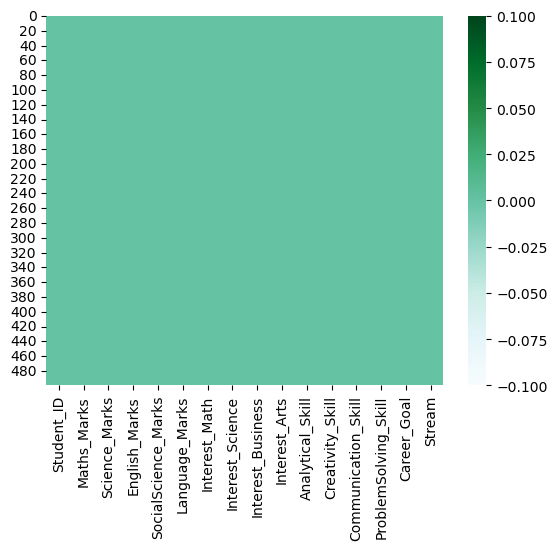

In [16]:
sns.heatmap(df.isnull(),cmap="BuGn")

Visualization showing no null values as same shade of 0.00 for entire heatmap

As there are no missing values no need to handle them

### DUPLICATE VALUES

Find Duplicates

In [17]:
df.duplicated().sum()

0

No duplicates found

### NUMERICAL DATA ANALYSIS

Identify Numerical Columns

In [18]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\tNumerical Colums are as below")
for i in numerical_columns:
    print("\t",i)
print("\nTotal Numerical columns:",len(numerical_columns))

	Numerical Colums are as below
	 Maths_Marks
	 Science_Marks
	 English_Marks
	 SocialScience_Marks
	 Language_Marks
	 Interest_Math
	 Interest_Science
	 Interest_Business
	 Interest_Arts
	 Analytical_Skill
	 Creativity_Skill
	 Communication_Skill
	 ProblemSolving_Skill

Total Numerical columns: 13


Statistical information about numerical columns

In [19]:
stat={}
for n in numerical_columns:
    stat[n]={
    "Mean":df[n].mean(),
    "Median": df[n].median(),
    "Mode":df[n].mode()[0],
    "VARIANCE":df[n].var(),
    "Standard Deviation":df[n].std(),
    "Range":df[n].max() - df[n].min(),
    "Skewness":df[n].skew(),
    "Kurtosis":df[n].kurt()}
  

s=pd.DataFrame(stat)
s.T

Mean  Median  Mode    VARIANCE  Standard Deviation  \
Maths_Marks           70.112    70.0  85.0  314.869194           17.744554   
Science_Marks         67.486    66.0  83.0  298.041888           17.263890   
English_Marks         69.834    70.0  55.0  293.741928           17.138901   
SocialScience_Marks   69.480    69.0  61.0  298.971543           17.290794   
Language_Marks        69.858    69.0  48.0  298.963764           17.290569   
Interest_Math          3.038     3.0   5.0    2.012581            1.418655   
Interest_Science       3.086     3.0   5.0    2.010625            1.417965   
Interest_Business      3.060     3.0   4.0    2.040481            1.428454   
Interest_Arts          2.976     3.0   2.0    1.963351            1.401196   
Analytical_Skill       2.912     3.0   1.0    1.992240            1.411467   
Creativity_Skill       2.956     3.0   1.0    2.010084            1.417774   
Communication_Skill    2.946     3.0   2.0    1.975034            1.405359   
ProblemSolving_Skill   3.036     3.0   5.0    2.014733            1.419413   

                      Range  Skewness  Kurtosis  
Maths_Marks            60.0 -0.034838 -1.205391  
Science_Marks          60.0  0.138087 -1.127840  
English_Marks          60.0  0.037004 -1.138988  
SocialScience_Marks    60.0  0.038544 -1.176768  
Language_Marks         60.0  0.041235 -1.178851  
Interest_Math           4.0  0.004570 -1.299916  
Interest_Science        4.0 -0.067871 -1.302482  
Interest_Business       4.0 -0.085173 -1.319155  
Interest_Arts           4.0  0.034043 -1.289611  
Analytical_Skill        4.0  0.074981 -1.280313  
Creativity_Skill        4.0  0.018669 -1.300821  
Communication_Skill     4.0  0.100570 -1.256633  
ProblemSolving_Skill    4.0 -0.013088 -1.306809

### UNIVARIATE ANALYSIS

In [20]:
def random_hex_color():
    return "#{:06x}".format(np.random.randint(0, 0xFFFFFF))

Strip plots help visualize data distribution and density for numerical features.<br> The jittered points allow you to see overlapping values better than a standard scatter plot.

<Figure size 640x480 with 0 Axes>

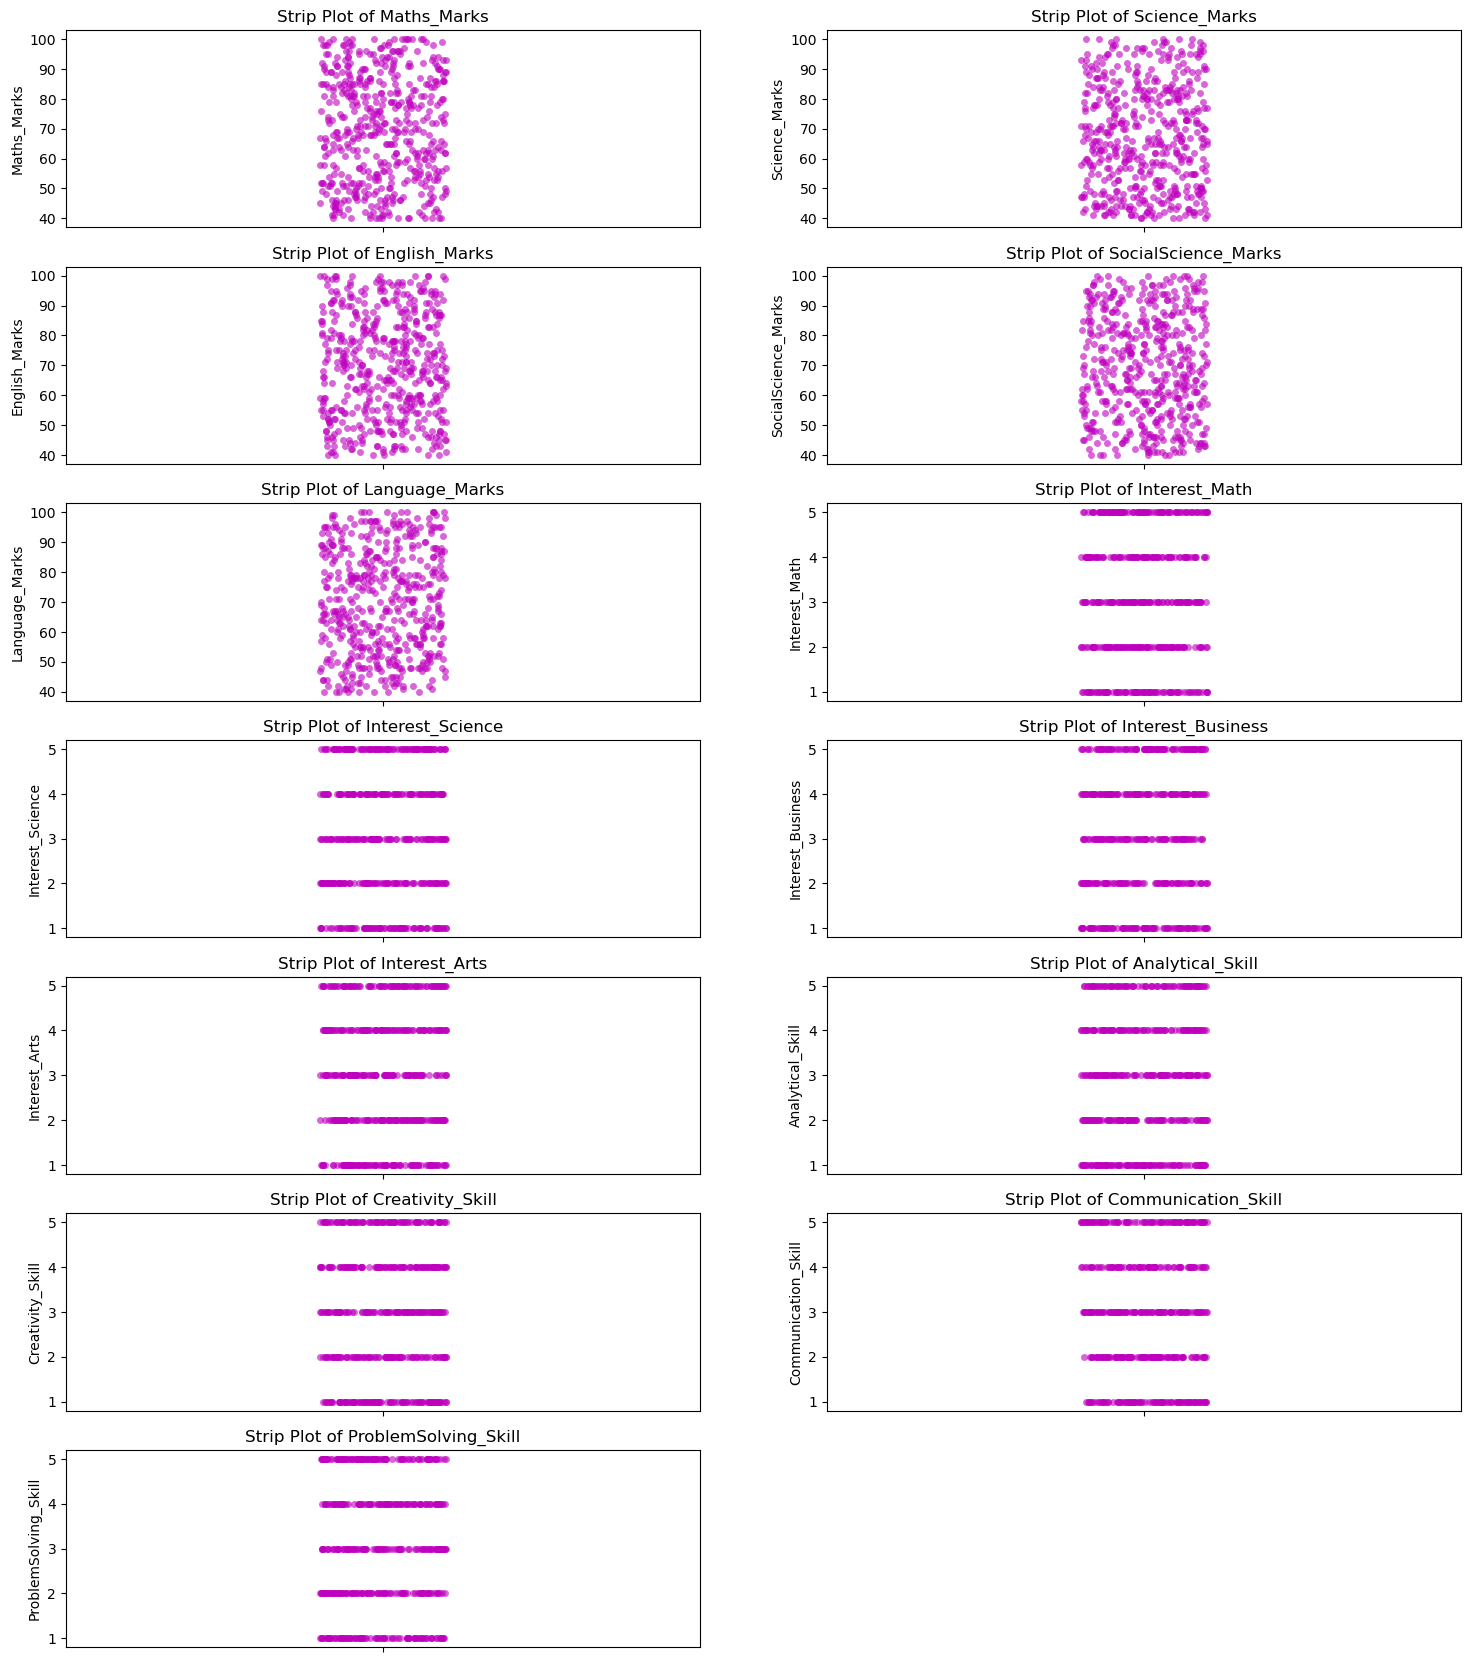

In [21]:
def plot_strip_plots(df, numerical_columns):
    n_cols = 2  # number of plots per row
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # auto rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3))
    axes = axes.flatten()  # flatten for easy indexing

    for i, col in enumerate(numerical_columns):
        sns.stripplot(y=df[col], ax=axes[i], jitter=True, color="m", alpha=0.6)
        axes[i].set_title(f"Strip Plot of {col}")

    # Hide unused axes if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


plot_strip_plots(df, numerical_columns)


ECDF plots show the cumulative probability distribution of numerical data, helping to understand how values are spread.

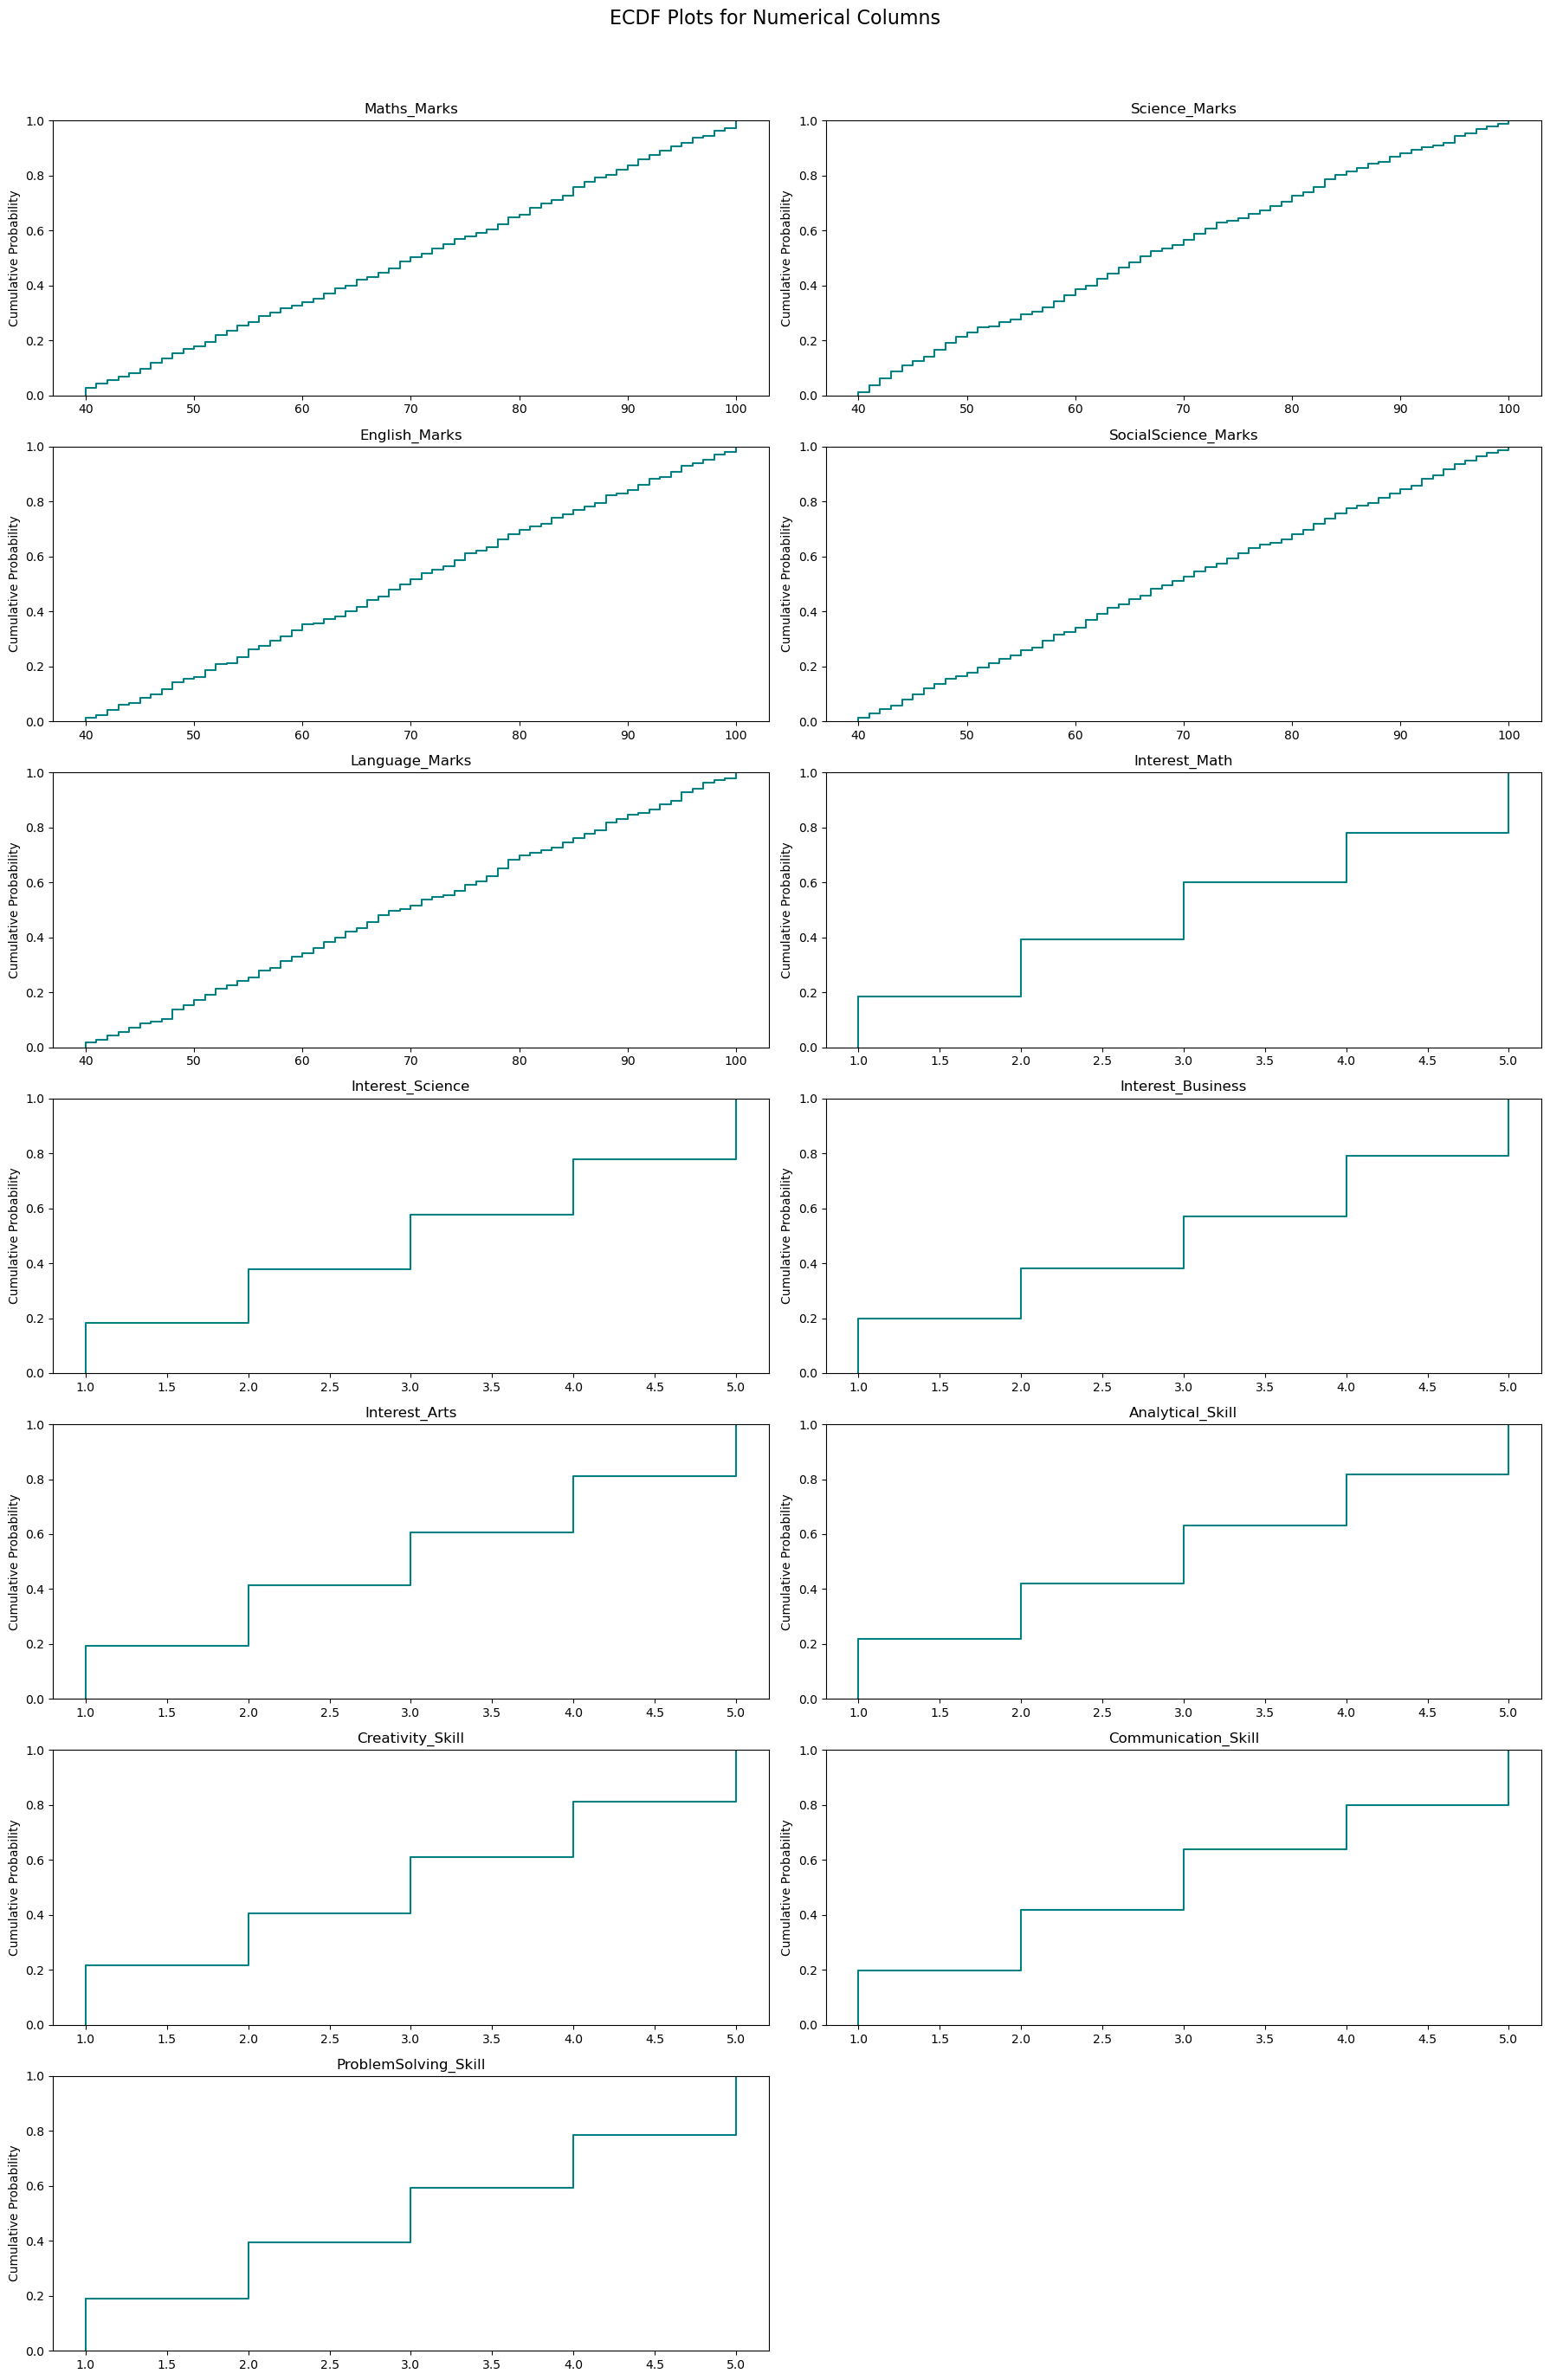

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_ecdf(df, numerical_columns):
    n_cols = 2  # plots per row
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    fig.suptitle('ECDF Plots for Numerical Columns', fontsize=16)

    axes = axes.flatten()  # flatten for easy indexing

    for i, col in enumerate(numerical_columns):
        sns.ecdfplot(df[col], ax=axes[i], color='teal')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Cumulative Probability')

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
    plt.show()

    
plot_ecdf(df, numerical_columns)



### BIVARIATE ANALYSIS

Below visualization helps in understanding the relationship between numerical variables using scatter plots and regression lines.

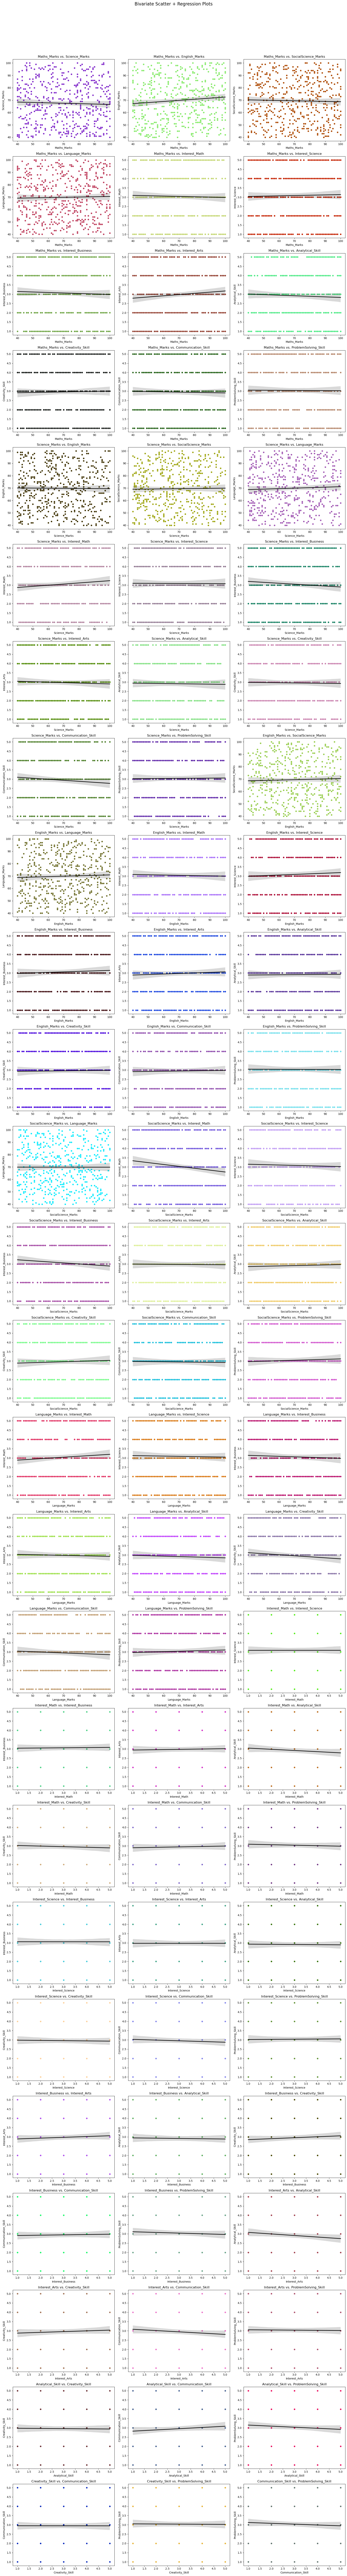

In [27]:
import itertools


combinations = list(itertools.combinations(numerical_columns, 2))


n_cols = 3
n_rows = (len(combinations) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, (col1, col2) in enumerate(combinations):
    sns.scatterplot(x=df[col1], y=df[col2], ax=axes[i], color=random_hex_color())
    sns.regplot(x=df[col1], y=df[col2], ax=axes[i], scatter=False, color='black')  
    axes[i].set_title(f'{col1} vs. {col2}')


plt.tight_layout()
plt.suptitle('Bivariate Scatter + Regression Plots', fontsize=16, y=1.02)
plt.show()


A Hexbin Plot is useful for visualizing density distributions between two numerical variables

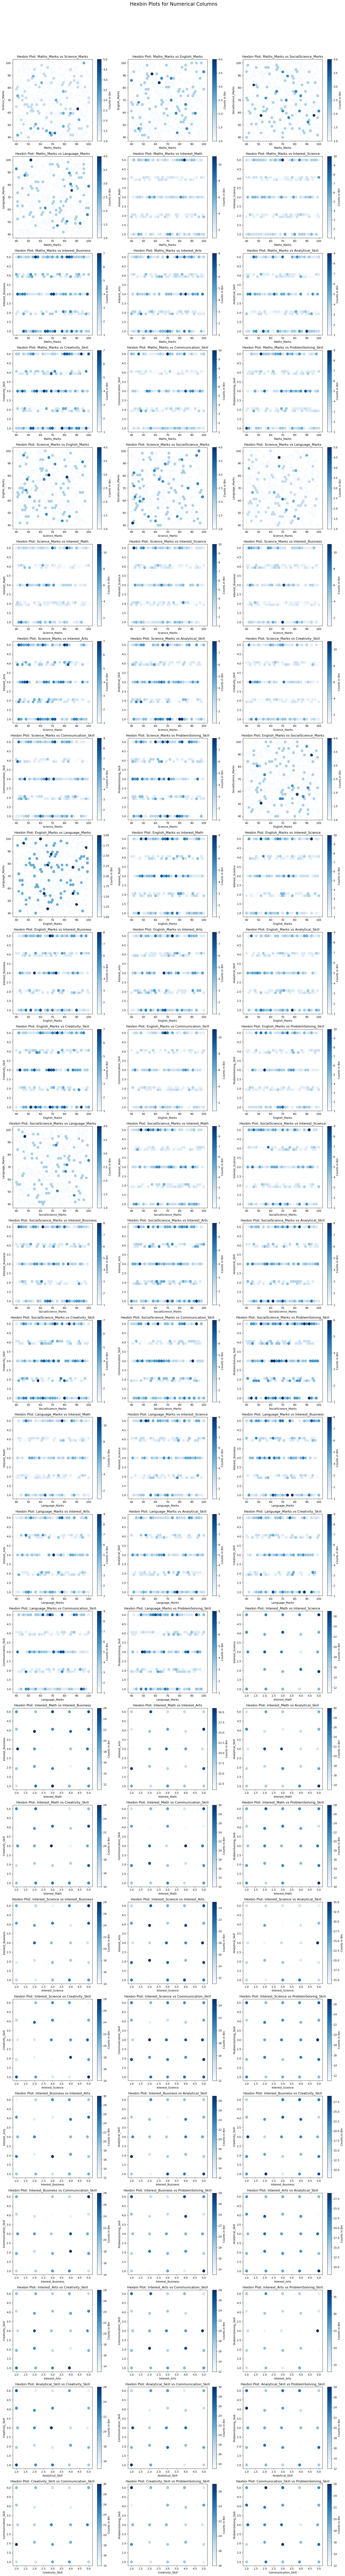

In [28]:
combinations = list(itertools.combinations(numerical_columns, 2))


n_cols = 3  
n_rows = (len(combinations) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()


for i, (col1, col2) in enumerate(combinations):
    hb = axes[i].hexbin(df[col1], df[col2], gridsize=30, cmap='Blues', mincnt=1)
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)
    axes[i].set_title(f'Hexbin Plot: {col1} vs {col2}')
    

    cb = fig.colorbar(hb, ax=axes[i], orientation='vertical')
    cb.set_label('Counts in Bin')

plt.tight_layout()
plt.suptitle('Hexbin Plots for Numerical Columns', fontsize=18, y=1.02)
plt.show()


### Covariance

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
cov_matrix = df_numeric.cov()
cov_matrix

### Correlation

In [29]:
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()
corr_matrix

Maths_Marks  Science_Marks  English_Marks  \
Maths_Marks              1.000000      -0.032992       0.091879   
Science_Marks           -0.032992       1.000000      -0.009615   
English_Marks            0.091879      -0.009615       1.000000   
SocialScience_Marks     -0.025263       0.014383       0.029666   
Language_Marks           0.023311       0.039392       0.034686   
Interest_Math           -0.023495       0.074196      -0.018367   
Interest_Science         0.020723      -0.004412       0.039675   
Interest_Business       -0.033393      -0.060263       0.032659   
Interest_Arts            0.082079      -0.029092       0.035049   
Analytical_Skill        -0.038332      -0.013703       0.008259   
Creativity_Skill         0.018358      -0.012307       0.010833   
Communication_Skill     -0.018320      -0.067391       0.013605   
ProblemSolving_Skill    -0.006764       0.007054      -0.002967   

                      SocialScience_Marks  Language_Marks  Interest_Math  \
Maths_Marks                     -0.025263        0.023311      -0.023495   
Science_Marks                    0.014383        0.039392       0.074196   
English_Marks                    0.029666        0.034686      -0.018367   
SocialScience_Marks              1.000000       -0.000650      -0.123046   
Language_Marks                  -0.000650        1.000000       0.063373   
Interest_Math                   -0.123046        0.063373       1.000000   
Interest_Science                -0.025718       -0.016666       0.000365   
Interest_Business               -0.067863       -0.032434       0.010740   
Interest_Arts                   -0.007712       -0.021813       0.018606   
Analytical_Skill                 0.022016       -0.027857      -0.064380   
Creativity_Skill                 0.029557       -0.067535      -0.032047   
Communication_Skill             -0.011219       -0.039490       0.023145   
ProblemSolving_Skill             0.029833        0.027155      -0.026556   

                      Interest_Science  Interest_Business  Interest_Arts  \
Maths_Marks                   0.020723          -0.033393       0.082079   
Science_Marks                -0.004412          -0.060263      -0.029092   
English_Marks                 0.039675           0.032659       0.035049   
SocialScience_Marks          -0.025718          -0.067863      -0.007712   
Language_Marks               -0.016666          -0.032434      -0.021813   
Interest_Math                 0.000365           0.010740       0.018606   
Interest_Science              1.000000          -0.000574       0.000032   
Interest_Business            -0.000574           1.000000       0.043774   
Interest_Arts                 0.000032           0.043774       1.000000   
Analytical_Skill             -0.009228          -0.015267      -0.083146   
Creativity_Skill             -0.013067           0.051772       0.039818   
Communication_Skill          -0.038897           0.017589      -0.068844   
ProblemSolving_Skill          0.008416          -0.036649      -0.009641   

                      Analytical_Skill  Creativity_Skill  Communication_Skill  \
Maths_Marks                  -0.038332          0.018358            -0.018320   
Science_Marks                -0.013703         -0.012307            -0.067391   
English_Marks                 0.008259          0.010833             0.013605   
SocialScience_Marks           0.022016          0.029557            -0.011219   
Language_Marks               -0.027857         -0.067535            -0.039490   
Interest_Math                -0.064380         -0.032047             0.023145   
Interest_Science             -0.009228         -0.013067            -0.038897   
Interest_Business            -0.015267          0.051772             0.017589   
Interest_Arts                -0.083146          0.039818            -0.068844   
Analytical_Skill              1.000000         -0.009950             0.066299   
Creativity_Skill             -0.009950          1.000000      

### HeatMap showing correlation

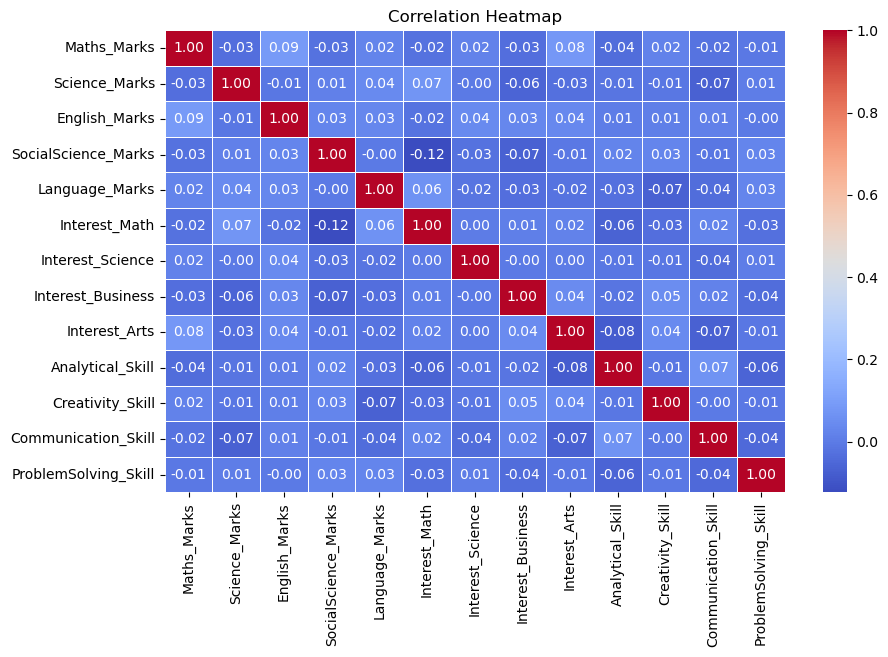

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### To Check normality of columns

### Zscore

In [31]:
for c in numerical_columns:
    print(f"Zscore in {c}")
    zscore=scipy.stats.zscore(df[c])
    print(zscore)
    print("-"*50)

Zscore in Maths_Marks
0      1.009094
1     -0.852495
2      0.162917
3     -1.416612
4     -1.360200
         ...   
495    0.106505
496    1.178329
497    1.629623
498    0.557799
499   -1.360200
Name: Maths_Marks, Length: 500, dtype: float64
--------------------------------------------------
Zscore in Science_Marks
0     -0.086162
1     -1.129845
2     -1.303792
3      0.319715
4     -1.129845
         ...   
495   -0.608003
496   -1.361774
497    0.609627
498   -0.550021
499   -0.028179
Name: Science_Marks, Length: 500, dtype: float64
--------------------------------------------------
Zscore in English_Marks
0      1.469826
1     -0.107115
2     -0.165520
3     -0.223926
4     -1.392030
         ...   
495    0.068101
496    0.768963
497    1.761852
498   -0.457547
499   -0.107115
Name: English_Marks, Length: 500, dtype: float64
--------------------------------------------------
Zscore in SocialScience_Marks
0      1.303732
1     -0.838279
2      0.956379
3     -0.954063
4      0.7

### Hypotesis Testing

In [32]:
def check_normal_dist(col):
    stat,p_value=shapiro(df[col])
    print(f"P Value:{p_value}")
    if p_value >=0.05:
        print(f"Data normally distributed in column {col}")
    else:
         print(f"Data not nomally distributed in column {col}")

In [33]:
for c in numerical_columns:
    print(f"{c}")
    check_normal_dist(c)
    print("-"*50)

Maths_Marks
P Value:1.8459190188536063e-11
Data not nomally distributed in column Maths_Marks
--------------------------------------------------
Science_Marks
P Value:3.5575054945897764e-11
Data not nomally distributed in column Science_Marks
--------------------------------------------------
English_Marks
P Value:1.8978191526363473e-10
Data not nomally distributed in column English_Marks
--------------------------------------------------
SocialScience_Marks
P Value:5.0373209914591684e-11
Data not nomally distributed in column SocialScience_Marks
--------------------------------------------------
Language_Marks
P Value:5.350184682153621e-11
Data not nomally distributed in column Language_Marks
--------------------------------------------------
Interest_Math
P Value:1.0137295484657042e-18
Data not nomally distributed in column Interest_Math
--------------------------------------------------
Interest_Science
P Value:9.64257843926154e-19
Data not nomally distributed in column Interest_Sci

## Visual Representation of Normality distribution of each numerical column

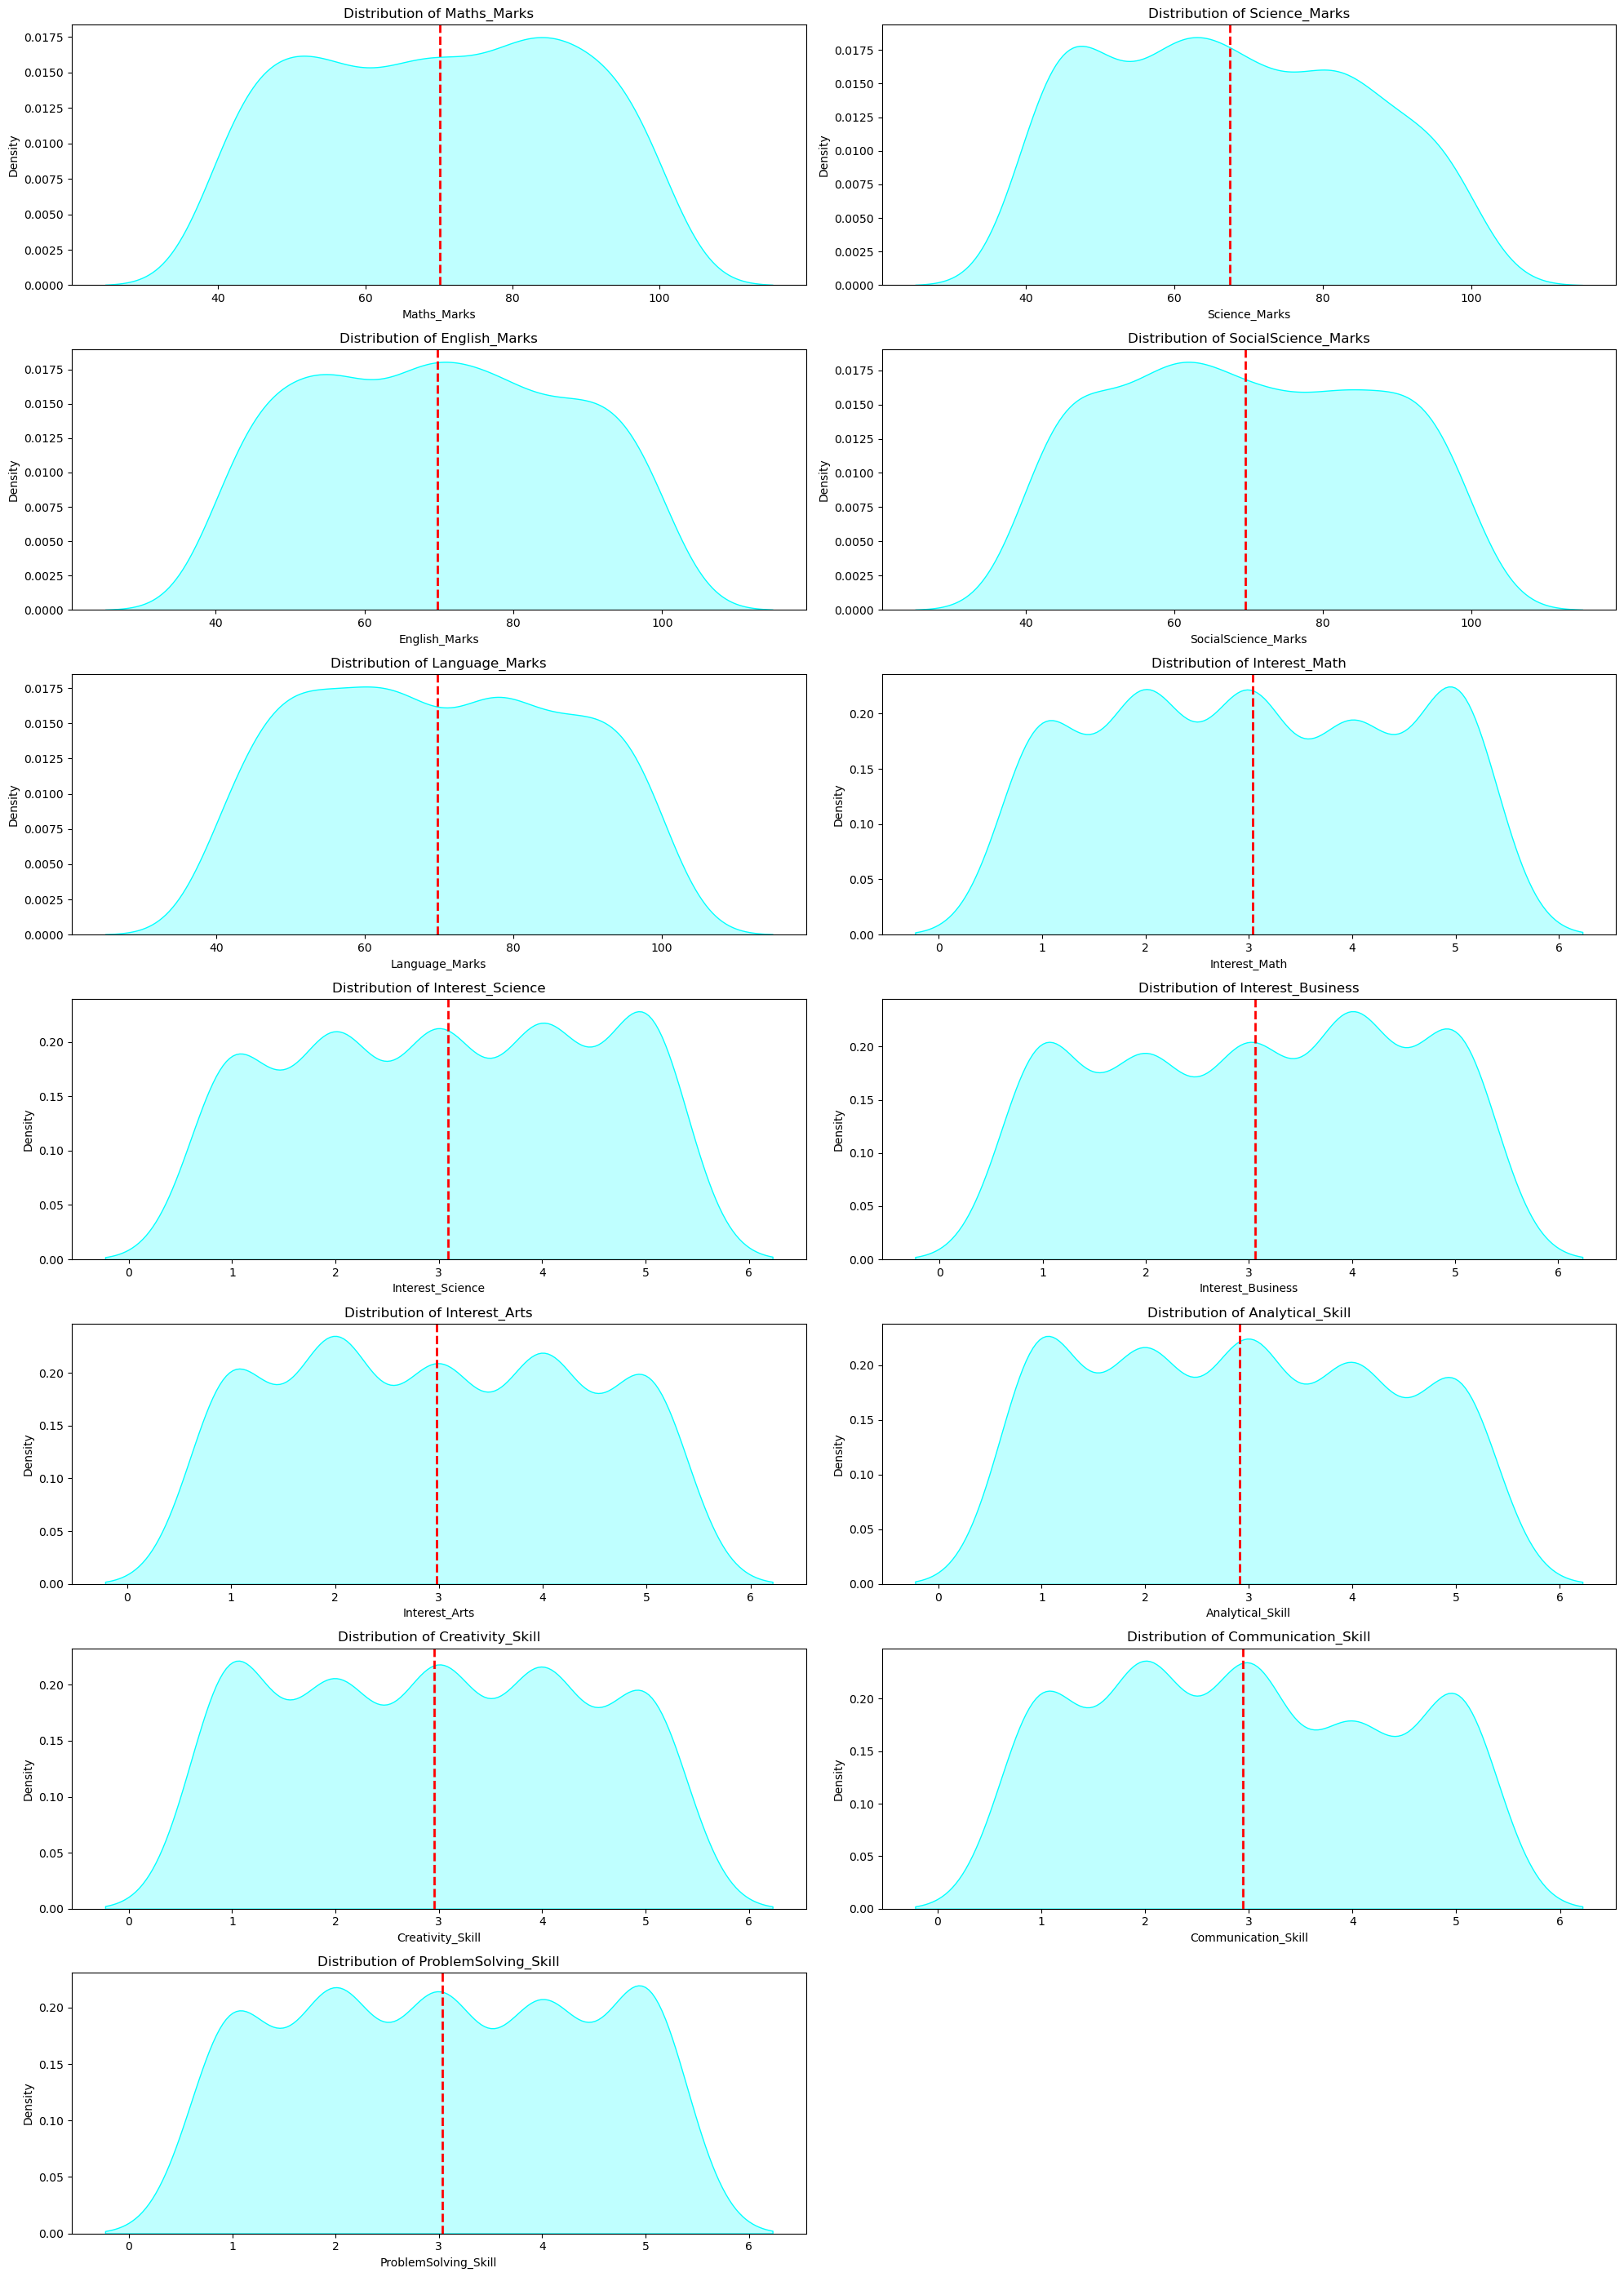

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kde_with_mean(df, numerical_columns):
    n_cols = 2   # plots per row
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # auto rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    axes = axes.flatten()  # flatten for easy indexing

    for i, col in enumerate(numerical_columns):
        sns.kdeplot(df[col], ax=axes[i], color="cyan", fill=True)
        axes[i].set_title(f"Distribution of {col}")
        
        # Mean line
        mean_value = df[col].mean()
        axes[i].axvline(mean_value, color='red', linestyle='--', linewidth=2)

    # Remove unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
plot_kde_with_mean(df, numerical_columns)



### OUTLIERS 

Identifying and Handling Outliers

In [38]:
outlier_col=[]
for c in numerical_columns:
    print("Checking for outilers for column",c)
    
    q1=df[c].quantile(0.25)
    q2=df[c].quantile(0.50)
    q3=df[c].quantile(0.75)
    iqr=q3-q1
    
    Lowertail=q1-1.5*iqr
    Uppertail=q3+1.5*iqr
    
    outliers=df[(df[c] < Lowertail) | (df[c] > Uppertail)]
    
    if outliers.empty:
        print("No outliers present")
        print("-"*50)
    else:
        sns.boxplot(y=df[c],color="LightBlue")
        plt.show()
        outlier_col.append(c)
        print("-"*50)
        print("Handling outliers of only present columns")
for c in outlier_col:
        df.loc[(df[c] < Lowertail),c] = Lowertail
        df.loc[(df[c] > Uppertail),c] = Uppertail
        print("After Handling Outliers with its lower and upper tails")
        outliers=df[(df[c] < Lowertail) | (df[c] > Uppertail)]
        print(f"Outilers of {c}\n{outliers}")
        print(f"Box plot of Column {c} after handling outiler")
        #sns.boxplot(y=df[c],color="Grey")
        print("Box Plot After Handling Outliers")
        df.head()
        #plt.show()
        print("-"*50)

Checking for outilers for column Maths_Marks
No outliers present
--------------------------------------------------
Checking for outilers for column Science_Marks
No outliers present
--------------------------------------------------
Checking for outilers for column English_Marks
No outliers present
--------------------------------------------------
Checking for outilers for column SocialScience_Marks
No outliers present
--------------------------------------------------
Checking for outilers for column Language_Marks
No outliers present
--------------------------------------------------
Checking for outilers for column Interest_Math
No outliers present
--------------------------------------------------
Checking for outilers for column Interest_Science
No outliers present
--------------------------------------------------
Checking for outilers for column Interest_Business
No outliers present
--------------------------------------------------
Checking for outilers for column Interest_Ar

## CATEGORICAL DATA ANALYSIS

Identify Numerical Columns

In [39]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("\tCategorical Columns are as below")
for i in categorical_columns:
    print("\t",i)
print("\nTotal Numerical columns:",len(categorical_columns))

	Categorical Columns are as below
	 Student_ID
	 Career_Goal
	 Stream

Total Numerical columns: 3


Statistical information about categorical columns

In [41]:
for c in categorical_columns:
    print(c)
    print(f"Number of unique values: {df[c].nunique()}")
    print(f"Value counts:\n{df[c].value_counts()}")
    print(f"Mode value: {df[c].mode()[0]}")
    print("-"*50)

Student_ID
Number of unique values: 500
Value counts:
1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: Student_ID, Length: 500, dtype: int64
Mode value: 1
--------------------------------------------------
Career_Goal
Number of unique values: 8
Value counts:
Govt Job    74
Artist      69
Writer      69
Teacher     63
Doctor      62
CA          61
Business    52
Engineer    50
Name: Career_Goal, dtype: int64
Mode value: Govt Job
--------------------------------------------------
Stream
Number of unique values: 3
Value counts:
Commerce    290
Arts        178
Science      32
Name: Stream, dtype: int64
Mode value: Commerce
--------------------------------------------------


UNIVARIATE ANALYSIS

Count plot visualizes the frequency distribution of different categories in a dataset. The labels on top of the bars provide exact counts, making interpretation easier.



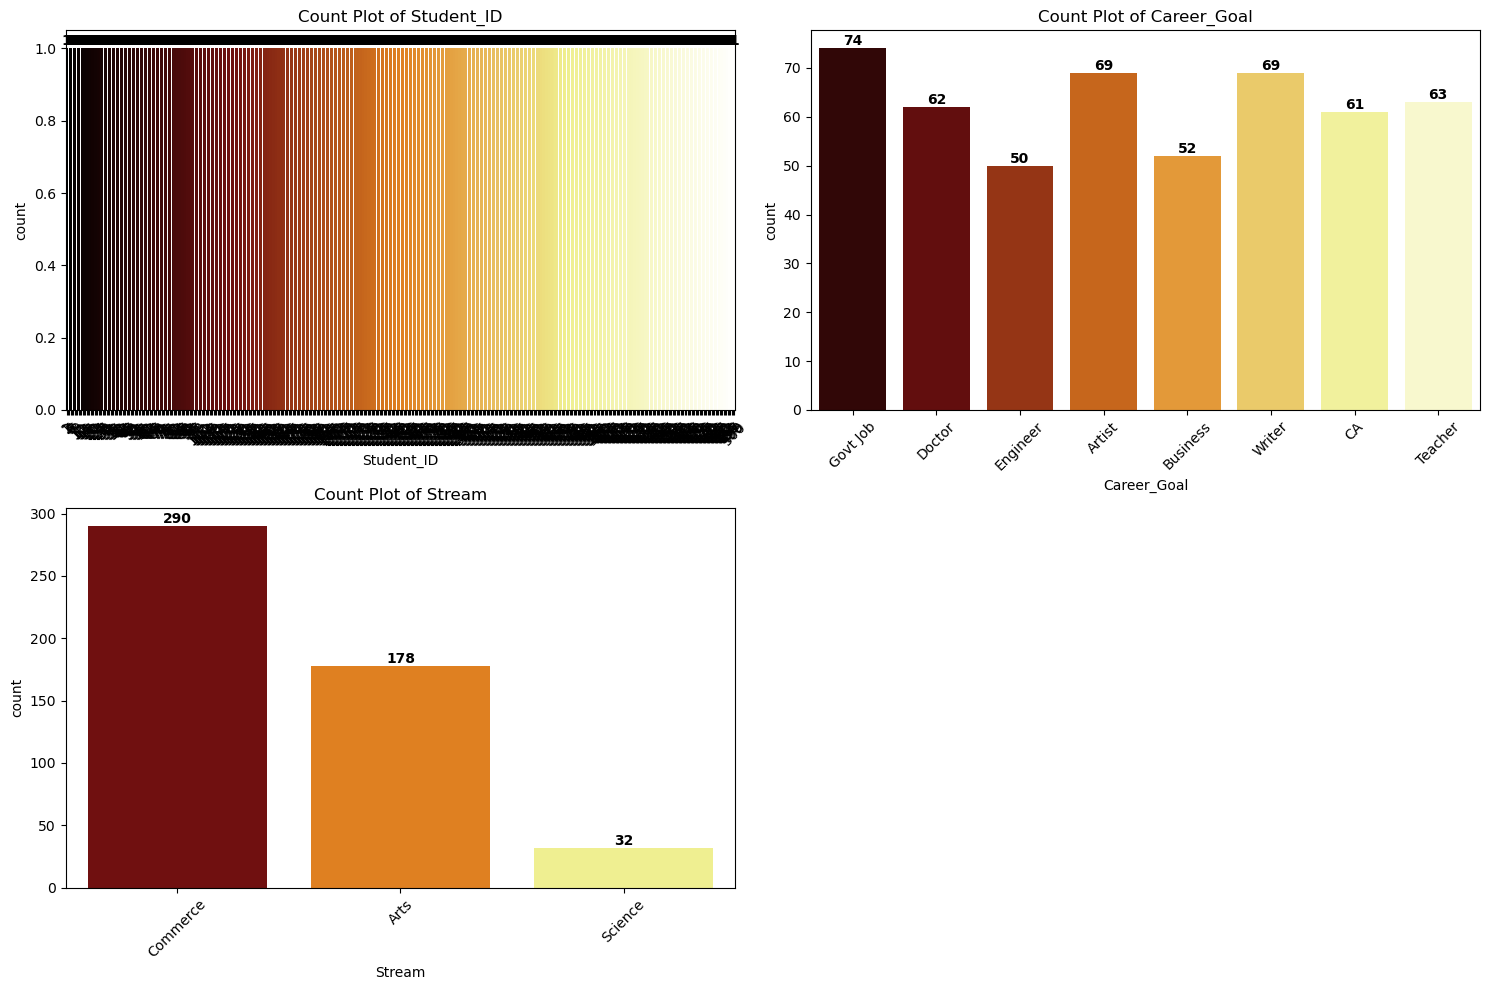

In [42]:
def plot_categorical_countplots(df, categorical_columns):
    num_cols = len(categorical_columns)
    rows = (num_cols // 2) + (num_cols % 2)  
    fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))  

    axes = axes.flatten()  
    for i, col in enumerate(categorical_columns):
        ax = axes[i]
        sns.countplot(x=df[col], data=df, palette="afmhot", ax=ax)
        ax.set_title(f"Count Plot of {col}")
        ax.tick_params(axis="x", rotation=45)  
        
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}",  
                        (p.get_x() + p.get_width() / 2, p.get_height()),  
                        ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  

    plt.tight_layout()
    plt.show()


plot_categorical_countplots(df, categorical_columns)


Pie charts visually represent the proportion of each category within a variable, making it easier to identify dominant categories and distribution imbalances.

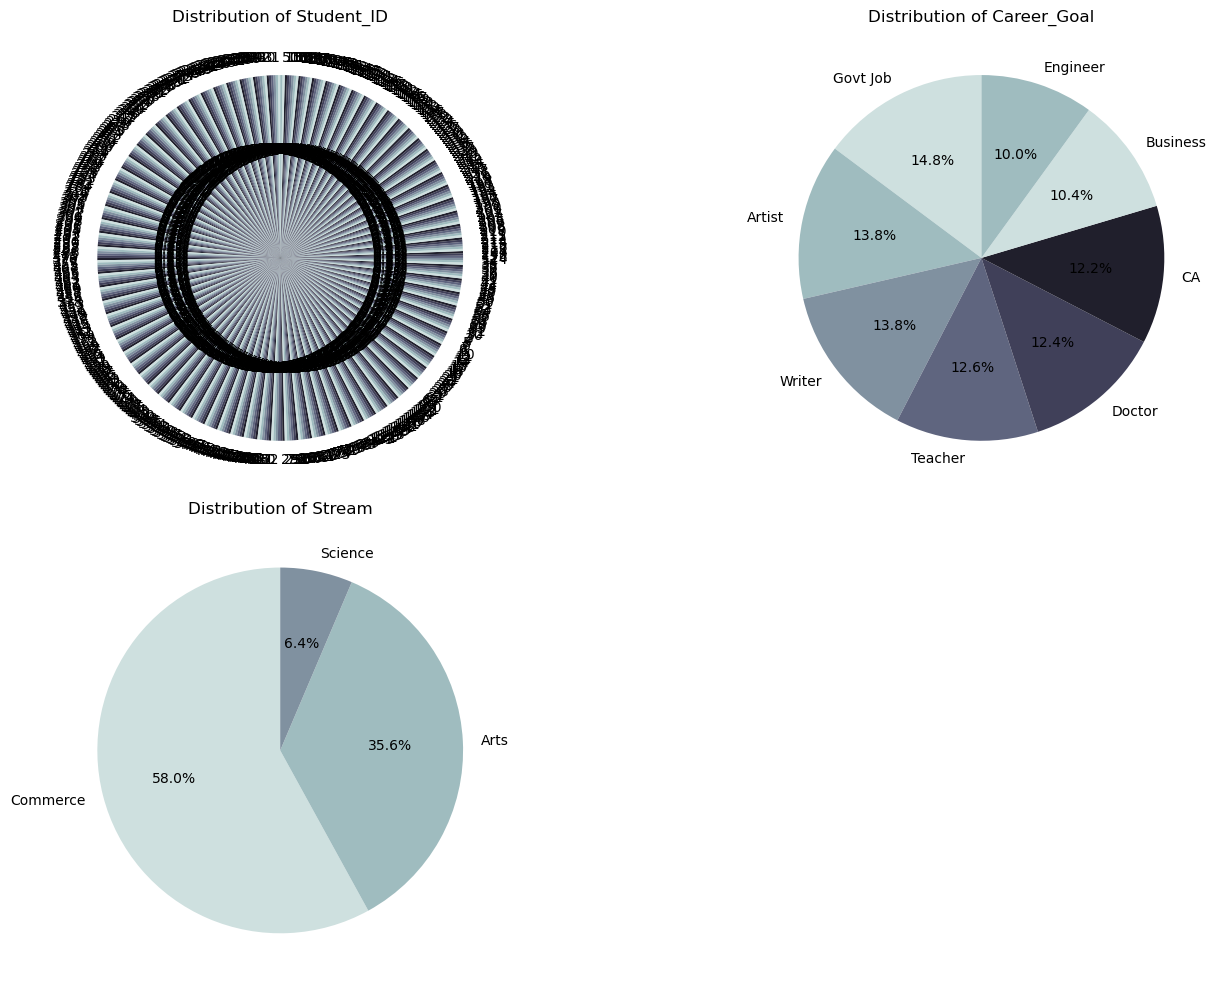

In [43]:
def plot_pie_charts(df, categorical_columns):
    num_cols = len(categorical_columns)
    rows = (num_cols // 2) + (num_cols % 2)  
    fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))  
    axes = axes.flatten() 
    
    for i, col in enumerate(categorical_columns):
        df[col].value_counts().plot.pie(
            autopct="%1.1f%%", ax=axes[i], colors=sns.color_palette("bone_r"), startangle=90)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_ylabel("")  

    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_pie_charts(df, categorical_columns)


### CONVERTING DATA TO NUMERIC FORMAT

In [45]:
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le  


df.head()


Student_ID  Maths_Marks  Science_Marks  English_Marks  SocialScience_Marks  \
0           0           88             66             95                   92   
1           1           55             48             68                   55   
2           2           73             45             67                   86   
3           3           45             73             66                   53   
4           4           46             48             46                   83   

   Language_Marks  Interest_Math  Interest_Science  Interest_Business  \
0              94              3                 5                  2   
1              88              3                 2                  5   
2              91              3                 3                  1   
3              78              5                 5                  4   
4              96              3                 5                  5   

   Interest_Arts  Analytical_Skill  Creativity_Skill  Communication_Skill  \
0              3                 4                 1                    4   
1              5                 2                 3                    1   
2              3                 2                 3                    5   
3              3                 1                 2                    5   
4              2                 4                 2                    1   

   ProblemSolving_Skill  Career_Goal  Stream  
0                     5            5       1  
1                     2            3       1  
2                     3            3       1  
3                     3            4       1  
4                     3            5       1

In [46]:
for col in categorical_columns:
    print(f"Column: {col}")
    print("Original Categories:", label_encoders[col].classes_) 
    print("Encoded Values:", list(range(len(label_encoders[col].classes_)))) 
    print("-" * 50)


Column: Student_ID
Original Categories: [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 26

# <I>TRAIN TEST SPLIT</I>

In [47]:
X = df.drop(columns=["Student_ID", "Career_Goal", "Stream"])
y = df["Stream"]


In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [51]:
X_train.shape

(400, 13)

In [52]:
y_train.shape

(400,)

In [53]:
X_test.shape

(100, 13)

In [54]:
y_test.shape

(100,)

# <I> MODEL TRAINING</I>

### Alogrithm2 -Decision Tree

In [55]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model

DecisionTreeClassifier(random_state=42)

In [57]:
dt_clf_model=dt_model.fit(X_train,y_train)
dt_clf_model

DecisionTreeClassifier(random_state=42)

Training Data

In [58]:
y_train_pred=dt_clf_model.predict(X_train)
y_train_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0,
       1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,

Model Evaluation for decision tree classifier on Training Data

In [59]:
print("#####Model Evaluation for Training data#####")
ac=accuracy_score(y_train,y_train_pred)
print("Accuary Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

#####Model Evaluation for Training data#####
Accuary Score 1.0
--------------------------------------------------
Confusion Matrix
 [[142   0   0]
 [  0 234   0]
 [  0   0  24]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       234
           2       1.00      1.00      1.00        24

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

--------------------------------------------------


Testing data

In [60]:
y_test_pred=dt_clf_model.predict(X_test)

Model Evaluation for decision tree classifier on Testing Data

In [61]:
print("#### Model Evaluation for testing data #####")
ac=accuracy_score(y_test,y_test_pred)
print("Accuracy Score",ac)
print("-"*60)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Marix\n",con_mat)
print("-"*60)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*60)

#### Model Evaluation for testing data #####
Accuracy Score 0.96
------------------------------------------------------------
Confusion Marix
 [[36  0  0]
 [ 0 56  0]
 [ 2  2  4]]
------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       0.97      1.00      0.98        56
           2       1.00      0.50      0.67         8

    accuracy                           0.96       100
   macro avg       0.97      0.83      0.87       100
weighted avg       0.96      0.96      0.95       100

------------------------------------------------------------


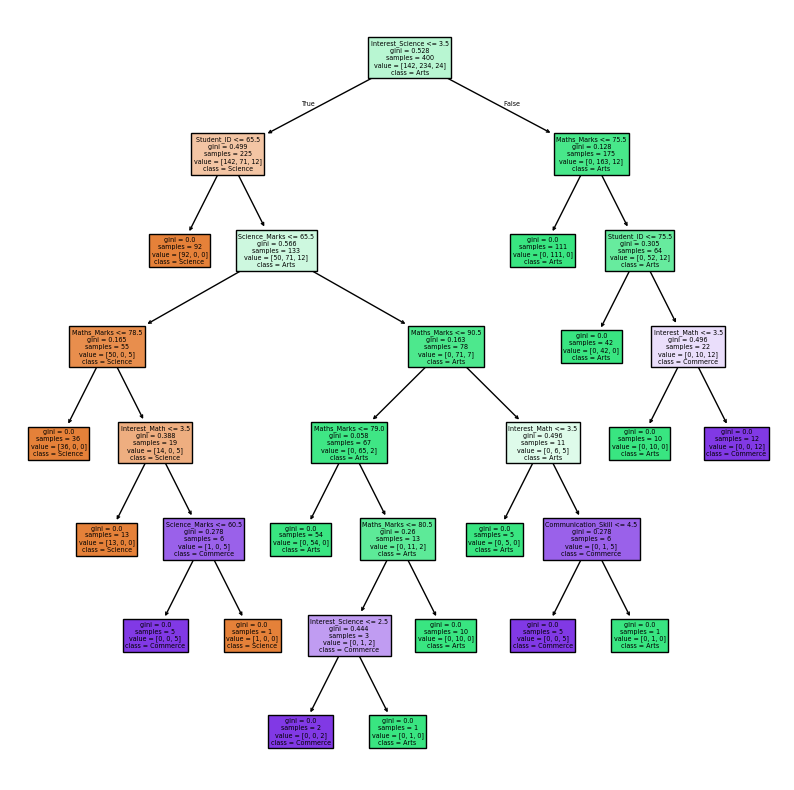

In [62]:
plt.figure(figsize=(10,10))
plot_tree(dt_clf_model,feature_names=df.columns,class_names=["Science","Arts","Commerce"],filled=True)
plt.show()

### Algorithm3-Decision Tree HyperParameter Tunning

In [63]:
hyperparameters = {"criterion":["gini","entropy","log_loss"],
                  "max_depth":np.arange(5,12),
                  "min_samples_split" : np.arange(2,11),
                  "min_samples_leaf" : np.arange(2,11)}
hyperparameters

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])}

In [64]:
rscv=RandomizedSearchCV(dt_clf_model,hyperparameters,cv=5)
rscv_model=rscv.fit(X_train,y_train)
rscv_model.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, min_samples_split=6,
                       random_state=42)

In [65]:
dt_clf=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7, min_samples_split=6,
                       random_state=42)
dt_clf_rscv_model=dt_clf.fit(X_train,y_train)
dt_clf_rscv_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7,
                       min_samples_split=6, random_state=42)

Trainig Data

In [66]:
y_train_pred=dt_clf_rscv_model.predict(X_train)

Model Evaluation for decision tree hyperparameter tunning on Training Data

In [67]:
print("#####Model Evaluation for Training data#####")
ac=accuracy_score(y_train,y_train_pred)
print("Accuary Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)

#####Model Evaluation for Training data#####
Accuary Score 0.9825
--------------------------------------------------
Confusion Matrix
 [[138   0   4]
 [  0 231   3]
 [  0   0  24]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       142
           1       1.00      0.99      0.99       234
           2       0.77      1.00      0.87        24

    accuracy                           0.98       400
   macro avg       0.92      0.99      0.95       400
weighted avg       0.99      0.98      0.98       400

--------------------------------------------------


Testing Data

In [69]:
y_test_pred=dt_clf_rscv_model.predict(X_test)

Model Evaluation for decision tree hyperparameter tunning on Testing Data

In [70]:
print("#### Model Evaluation for testing data #####")
ac=accuracy_score(y_test,y_test_pred)
print("Accuracy Score",ac)
print("-"*60)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Marix\n",con_mat)
print("-"*60)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*60)

#### Model Evaluation for testing data #####
Accuracy Score 0.98
------------------------------------------------------------
Confusion Marix
 [[35  0  1]
 [ 0 56  0]
 [ 1  0  7]]
------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       1.00      1.00      1.00        56
           2       0.88      0.88      0.88         8

    accuracy                           0.98       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.98      0.98      0.98       100

------------------------------------------------------------


### Algorithm4-Random Forest 

In [71]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42)
rfc

RandomForestClassifier(random_state=42)

In [72]:
rfc_model=rfc.fit(X_train,y_train)
rfc_model

RandomForestClassifier(random_state=42)

Training data

In [73]:
y_train_pred=rfc_model.predict(X_train)
y_train_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0,
       1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,

Model Evaluation with Random Forest Classifier for Training Data

In [74]:
print("----Model Evaluation for Training data----")
ac=accuracy_score(y_train,y_train_pred)
print("Accuracy Score",ac)
print("-"*50)

con_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_train,y_train_pred)
print("Classification Report\n",cr)
print("-"*50)


----Model Evaluation for Training data----
Accuracy Score 1.0
--------------------------------------------------
Confusion matrix
 [[142   0   0]
 [  0 234   0]
 [  0   0  24]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       234
           2       1.00      1.00      1.00        24

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

--------------------------------------------------


Testing Data

In [76]:
y_test_pred=rfc_model.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

Model Evaluation with Random Forest Classifier for Testing Data

In [77]:
print("-------Model Evaluation for Testing data-----")
ac=accuracy_score(y_test,y_test_pred)
print("Accuracy Score:",ac)
print("-"*50)

con_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix\n",con_mat)
print("-"*50)

cr=classification_report(y_test,y_test_pred)
print("Classification Report\n",cr)
print("-"*50)

-------Model Evaluation for Testing data-----
Accuracy Score: 0.93
--------------------------------------------------
Confusion Matrix
 [[36  0  0]
 [ 1 55  0]
 [ 2  4  2]]
--------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       0.93      0.98      0.96        56
           2       1.00      0.25      0.40         8

    accuracy                           0.93       100
   macro avg       0.95      0.74      0.77       100
weighted avg       0.93      0.93      0.91       100

--------------------------------------------------


Save to pickel

In [78]:
with open("streampredict.pkl", "wb") as f:
    pickle.dump(rfc_model, f)

In [2]:
%%writefile predictingstream.py
import streamlit as st
import numpy as np
import pickle
import time

# ✅ Load Model
model_path = "streampredict.pkl"   # make sure you have trained & saved model as stream.pkl
try:
    with open(model_path, "rb") as f:
        model = pickle.load(f)
except FileNotFoundError:
    st.error("❌ Model file not found! Please train and save as stream.pkl")
    st.stop()

# ✅ Themed UI Styling
st.set_page_config(page_title="Student Stream Predictor", page_icon="🎓", layout="wide")
st.markdown("""
    <style>
    body {background-color: #f0f9ff; color: #2c3e50; font-family: 'Poppins', sans-serif;}
    .stButton>button {background-color: #007bff; color: white; border-radius: 20px; font-size: 18px; padding: 10px 22px;}
    .title {font-size: 48px; font-weight: bold; color: #0077b6; text-align: center;}
    .subtitle {font-size: 22px; color: #023e8a; text-align: center; font-style: italic;}
    </style>
    """, unsafe_allow_html=True)

st.markdown("<div class='title'>🎓 Student Stream Predictor</div>", unsafe_allow_html=True)
st.markdown("<div class='subtitle'>📘 Suggests Science, Commerce, or Arts based on marks & interests</div>", unsafe_allow_html=True)

with st.sidebar:
    st.header("ℹ About the App")
    st.write("This app predicts which stream (Science / Commerce / Arts) a student should choose after 10th standard.")
    st.write("It uses a trained Machine Learning model (Decision Tree/Random Forest).")
    st.header("💡 Tips")
    st.write("✔ Enter marks honestly for better predictions.")
    st.write("✔ Use the results as guidance, not as the final decision.")

# ✅ Input Fields
st.subheader("📚 Enter Your 10th Marks")
maths = st.number_input("Maths Marks", min_value=0, max_value=100, value=70)
science = st.number_input("Science Marks", min_value=0, max_value=100, value=70)
english = st.number_input("English Marks", min_value=0, max_value=100, value=70)
social = st.number_input("Social Science Marks", min_value=0, max_value=100, value=70)
language = st.number_input("Language Marks", min_value=0, max_value=100, value=70)

st.subheader("📌 Interest Survey (1 = Low, 5 = High)")
interest_math = st.slider("Interest in Maths", 1, 5, 3)
interest_science = st.slider("Interest in Science", 1, 5, 3)
interest_business = st.slider("Interest in Business/Commerce", 1, 5, 3)
interest_arts = st.slider("Interest in Arts/Humanities", 1, 5, 3)

st.subheader("🧠 Skills (1 = Low, 5 = High)")
analytical = st.slider("Analytical Skill", 1, 5, 3)
creativity = st.slider("Creativity Skill", 1, 5, 3)
communication = st.slider("Communication Skill", 1, 5, 3)
problem_solving = st.slider("Problem Solving Skill", 1, 5, 3)



# Define mapping
stream_mapping = {0: "SCIENCE", 1: "COMMERCE", 2: "ARTS"}

# ✅ Prediction Logic
if st.button("📊 Predict My Stream"):
    with st.spinner('⏳ Analyzing your marks and interests...'):
        time.sleep(2)
        input_features = [
            maths, science, english, social, language,
            interest_math, interest_science, interest_business, interest_arts,
            analytical, creativity, communication, problem_solving
        ]
        try:
            pred_int = model.predict(np.array(input_features).reshape(1, -1))[0]
            stream_label = stream_mapping.get(pred_int, "Unknown")

            st.success(f"✅ Recommended Stream: **{stream_label}**")

            # Optional: show career suggestions
            if stream_label == "SCIENCE":
                st.info("🔬 Possible Careers: Engineer, Doctor, Researcher, Scientist, IT Professional")
            elif stream_label == "COMMERCE":
                st.info("💹 Possible Careers: CA, Accountant, MBA, Banker, Entrepreneur")
            else:
                st.info("🎨 Possible Careers: Writer, Artist, Teacher, Journalist, Psychologist")

        except Exception as e:
            st.error(f"❌ Prediction Error: {e}")



Overwriting predictingstream.py
